Weird replicates...

When opt=1, some replicates fixed variants with esize >> 0.5.  What is up with that?

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
f=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.fixations.h5')
f.reset_index(inplace=True,drop=True)

In [3]:
l=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.losses.h5')

In [4]:
l.reset_index(inplace=True,drop=True)

In [5]:
l=l[l.origin > 9000]

In [6]:
pheno=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.popstats.h5')
pheno.reset_index(inplace=True,drop=True)

In [7]:
BIG=f[f.esize>0.7]

In [8]:
BIG.head()

,esize,freq,generation,origin,pos,rep,age
161173,0.795858,0.0005,9999,9999,0.961259,25,1.0
161174,0.795858,0.0005,10000,9999,0.961259,25,2.0
161175,0.795858,0.0015,10001,9999,0.961259,25,3.0
161176,0.795858,0.0035,10002,9999,0.961259,25,4.0
161177,0.795858,0.0075,10003,9999,0.961259,25,5.0


In [9]:
UREPS=BIG.rep.unique()
print UREPS

[ 25  46 108 159 358 419 488 502 556 617 872 938 948 967 998]


25


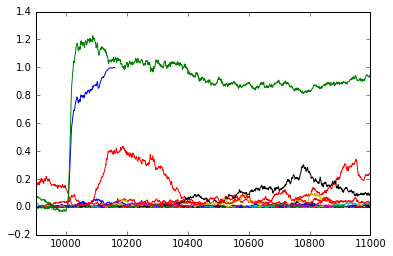

46


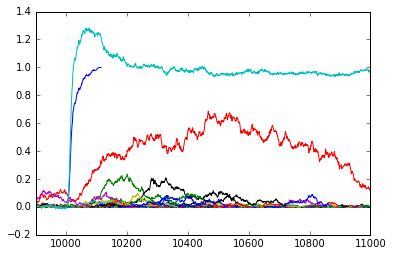

108


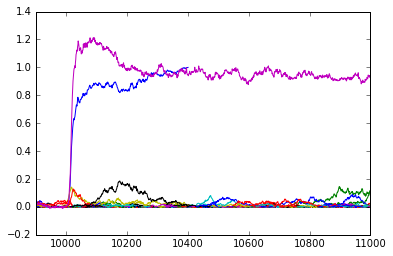

159


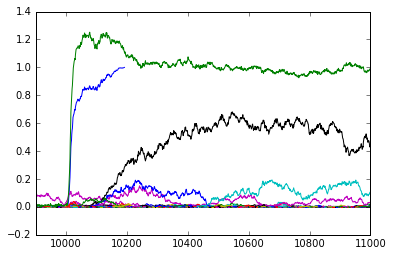

358


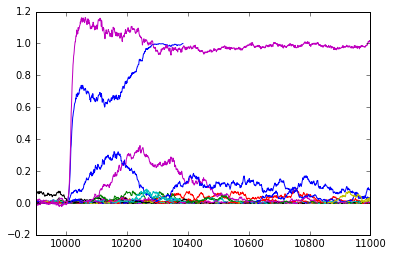

419


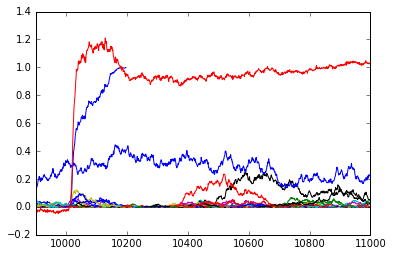

488


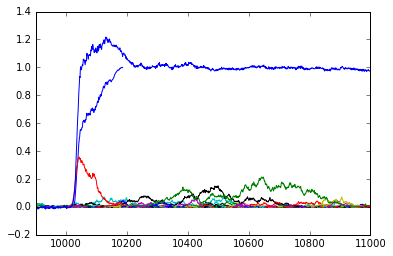

502


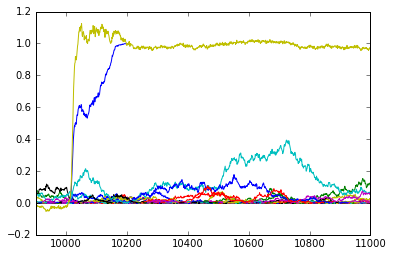

556


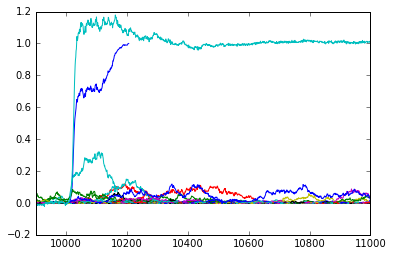

617


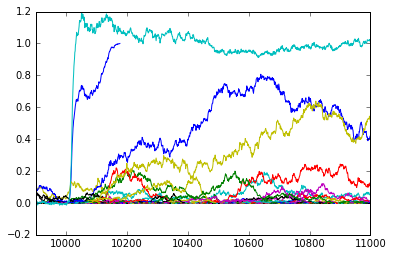

872


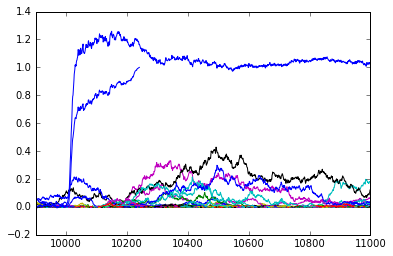

938


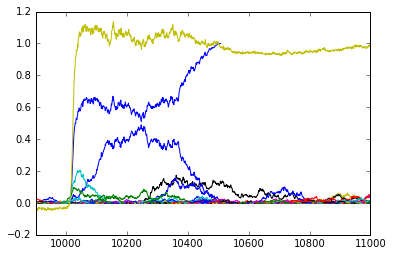

948


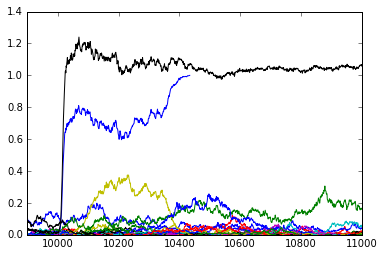

967


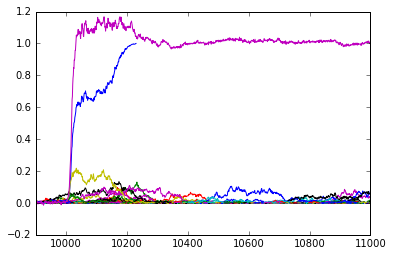

998


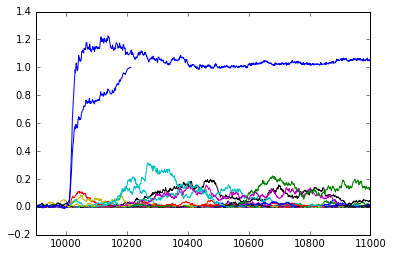

In [11]:
for REPNO in UREPS:
    print REPNO
    REP25=BIG[BIG.rep==REPNO]
    REP25G=REP25.groupby(['pos','esize','origin'])
    L25=l[l.rep==REPNO]
    L25g=L25.groupby(['pos','esize','origin'])
    phenoREP=pheno[(pheno.rep==REPNO) & (pheno.generation>9000) &(pheno.stat=='tbar')]
    fig,ax = plt.subplots()
    for i in REP25G.groups:
        ti=REP25G.get_group(i)
        plt.plot(ti.generation,ti.freq)
    for i in L25g.groups:
        li=L25g.get_group(i)
        plt.plot(li.generation,li.freq)
    plt.plot(phenoREP.generation,phenoREP.value)
    plt.xlim(9900,11000)
    plt.show()